In [ ]:
!pip install tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [133]:
import numpy as np
import keras
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import random
import shutil
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
import matplotlib.pyplot as plt
import cv2

# Data

In [134]:
import cv2,os
data_path='/content/drive/MyDrive/THỰC HÀNH MÁY HỌC/WEATHER/'
categories=os.listdir(data_path)
labels=[]
for i in range(len(categories)):
  if i!=0:
   labels.append(categories[i])


print(labels)

['shine', 'rainy', 'sunrise', 'cloudy', 'foggy']


In [140]:
img_size=100
data=[]

for category in labels:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append([resized,category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'

Exception: OpenCV(4.1.2) /io/opencv/modules/imgproc/src/resize.cpp:3720: error: (-215:Assertion failed) !ssize.empty() in function 'resize'



In [143]:
import random 

In [144]:
random.shuffle(data)

In [145]:
X = []
Y = [] 
for features,labels in data:
  X.append(features)
  Y.append(labels)

In [146]:
X = np.array(X)
Y = np.array(Y)

In [147]:
for i in range(len(Y)):
  if Y[i]== 'shine':
    Y[i]= 0
  if Y[i]== 'rainy':
    Y[i]= 1
  if Y[i]== 'sunrise':
    Y[i]= 2
  if Y[i]== 'cloudy':
    Y[i]= 3
  if Y[i]== 'foggy':
    Y[i]= 4


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


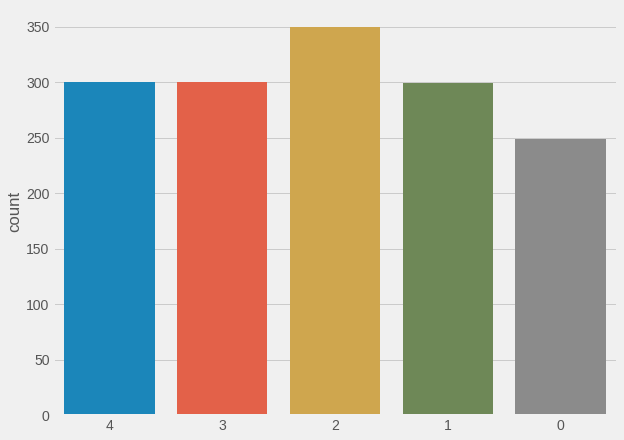

In [148]:
import seaborn as sns
plt.figure(figsize=(9,7))
plt.style.use("fivethirtyeight")
sns.countplot(Y)
plt.show()

In [149]:
X = X.astype('float32')/255.0
Y = Y.astype('float32')/255.0

In [150]:
X.shape
X.shape

(1498, 100, 100, 3)

# Truc quan hoa du lieu

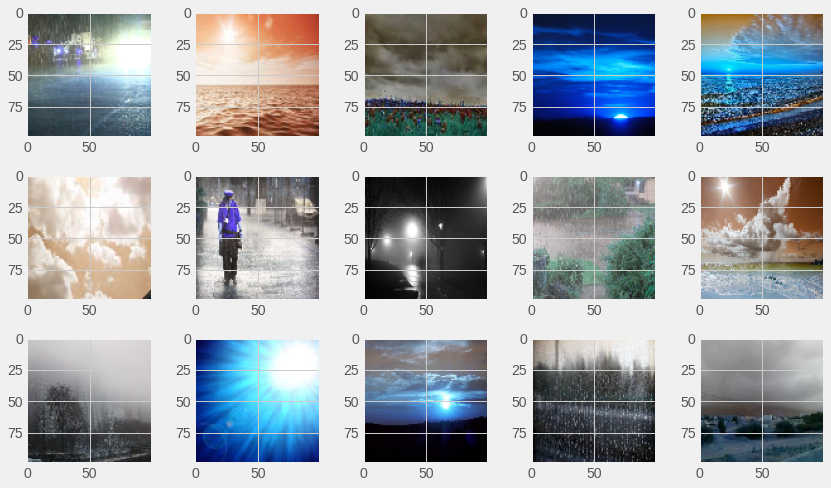

In [153]:
import random
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(data)))
    image = X[sample]
    #category = target[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)

    
plt.tight_layout()
plt.show()

#split data

In [154]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X,Y,test_size=0.1)

#ANN

In [155]:
# building sequential model

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape = X.shape[1:]),
    keras.layers.Dense(100, activation = 'relu'),
    keras.layers.Dense(70, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(20, activation = 'relu'),
    keras.layers.Dense(5, activation = 'softmax')
])

In [156]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 30000)             0         
                                                                 
 dense_10 (Dense)            (None, 100)               3000100   
                                                                 
 dense_11 (Dense)            (None, 70)                7070      
                                                                 
 dense_12 (Dense)            (None, 50)                3550      
                                                                 
 dense_13 (Dense)            (None, 20)                1020      
                                                                 
 dense_14 (Dense)            (None, 5)                 105       
                                                                 
Total params: 3,011,845
Trainable params: 3,011,845
No

In [157]:
# compiling model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              
              optimizer = tf.keras.optimizers.Adam(lr=0.01), metrics = ['accuracy'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [158]:
# fitting model
model_history = model.fit(X_train,y_train, validation_data = (X_test,y_test), epochs = 20)

Epoch 1/20
43/43 [==============================] - 2s 27ms/step - loss: 0.0303 - accuracy: 0.1610 - val_loss: 0.0000e+00 - val_accuracy: 0.2133
Epoch 2/20
43/43 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.1610 - val_loss: 0.0000e+00 - val_accuracy: 0.2133
Epoch 3/20
43/43 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.1610 - val_loss: 0.0000e+00 - val_accuracy: 0.2133
Epoch 4/20
43/43 [==============================] - 1s 24ms/step - loss: 0.0000e+00 - accuracy: 0.1610 - val_loss: 0.0000e+00 - val_accuracy: 0.2133
Epoch 5/20
43/43 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.1610 - val_loss: 0.0000e+00 - val_accuracy: 0.2133
Epoch 6/20
43/43 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.1610 - val_loss: 0.0000e+00 - val_accuracy: 0.2133
Epoch 7/20
43/43 [==============================] - 1s 23ms/step - loss: 0.0000e+00 - accuracy: 0.1610 - val_l

In [159]:
# evaluating model
loss,accuracy = model.evaluate(X_train,y_train)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")  

43/43 [==============================] - 0s 7ms/step - loss: 0.0000e+00 - accuracy: 0.1610
Loss: 0.0
Accuracy: 0.160979226231575


In [160]:
# compiling model
import tensorflow as tf

model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(), metrics = ['accuracy'])

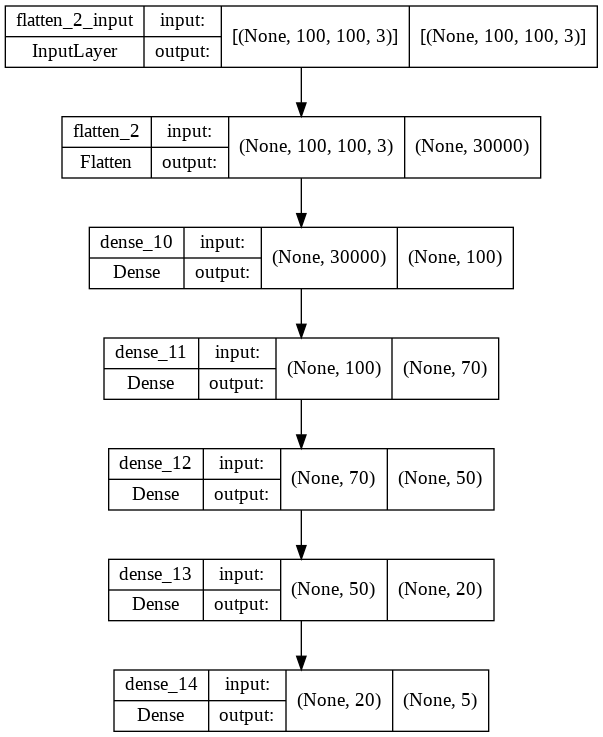

In [161]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes = True)

In [162]:
X_new = X_test[:5]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], dtype=float32)

In [174]:
y_preds=model.predict(X_new) 
classes_x=np.argmax(y_preds,axis=1)

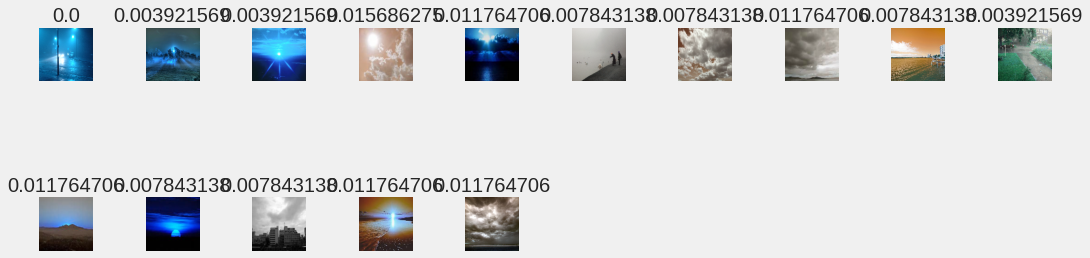

In [182]:
'''plt.figure(figsize = (15, 12))
plotnumber = 1

for i in range(15):
    if plotnumber <= 15:
        x = plt.subplot(5, 10, plotnumber)
        plt.imshow(X_train[i], cmap = 'binary')
        plt.axis('off')
        plt.title(y_test[round(plotnumber)])
        
    plotnumber += 1
  
plt.tight_layout()
plt.show()'''

In [183]:
model.save('/content/drive/MyDrive/THỰC HÀNH MÁY HỌC/model_ANN.h5')